# Subaru Sakashita

## Research question/interests

Briefly describe your research question or interests here.

What game made the highest sale?

What type of games are famous for each platform?

Which platform is the famous?

What year were the video games on a high note?

In [3]:
import pandas as pd
d = pd.read_csv('../data/raw/Video_Games.csv');
d

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN



## Clean up 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
df_cleaned = d.copy()
df_cleaned = df_cleaned.copy().drop(['Critic_Count','User_Score','Rating','User_Count'], axis=1)
df_cleaned = df_cleaned.dropna(axis=0) 
df_cleaned = df_cleaned[df_cleaned['NA_Sales'] >= 0]
df_cleaned = df_cleaned[df_cleaned['EU_Sales'] >= 0]
df_cleaned = df_cleaned[df_cleaned['JP_Sales'] >= 0]
df_cleaned = df_cleaned[df_cleaned['Other_Sales'] >= 0]

df_cleaned



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


<AxesSubplot:>

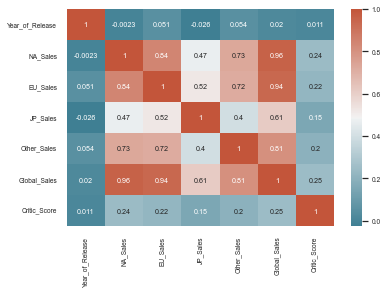

In [26]:
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


There is a positive correlation between sales in different regions. 
The graph also tells that Year of Release is negatively correlated with the sales. 



<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

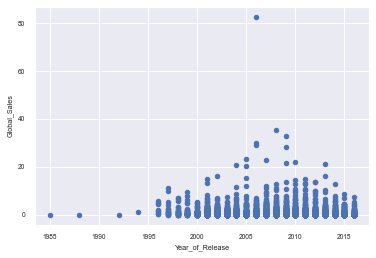

In [31]:
df_cleaned.plot(kind='scatter', x='Year_of_Release', y='Global_Sales')


The scatterplot tells us that video games started to gain its popularity from 1995.
Many games have the global sales around 10~15 million. But there is one game that made a great sales of over 80 million. 

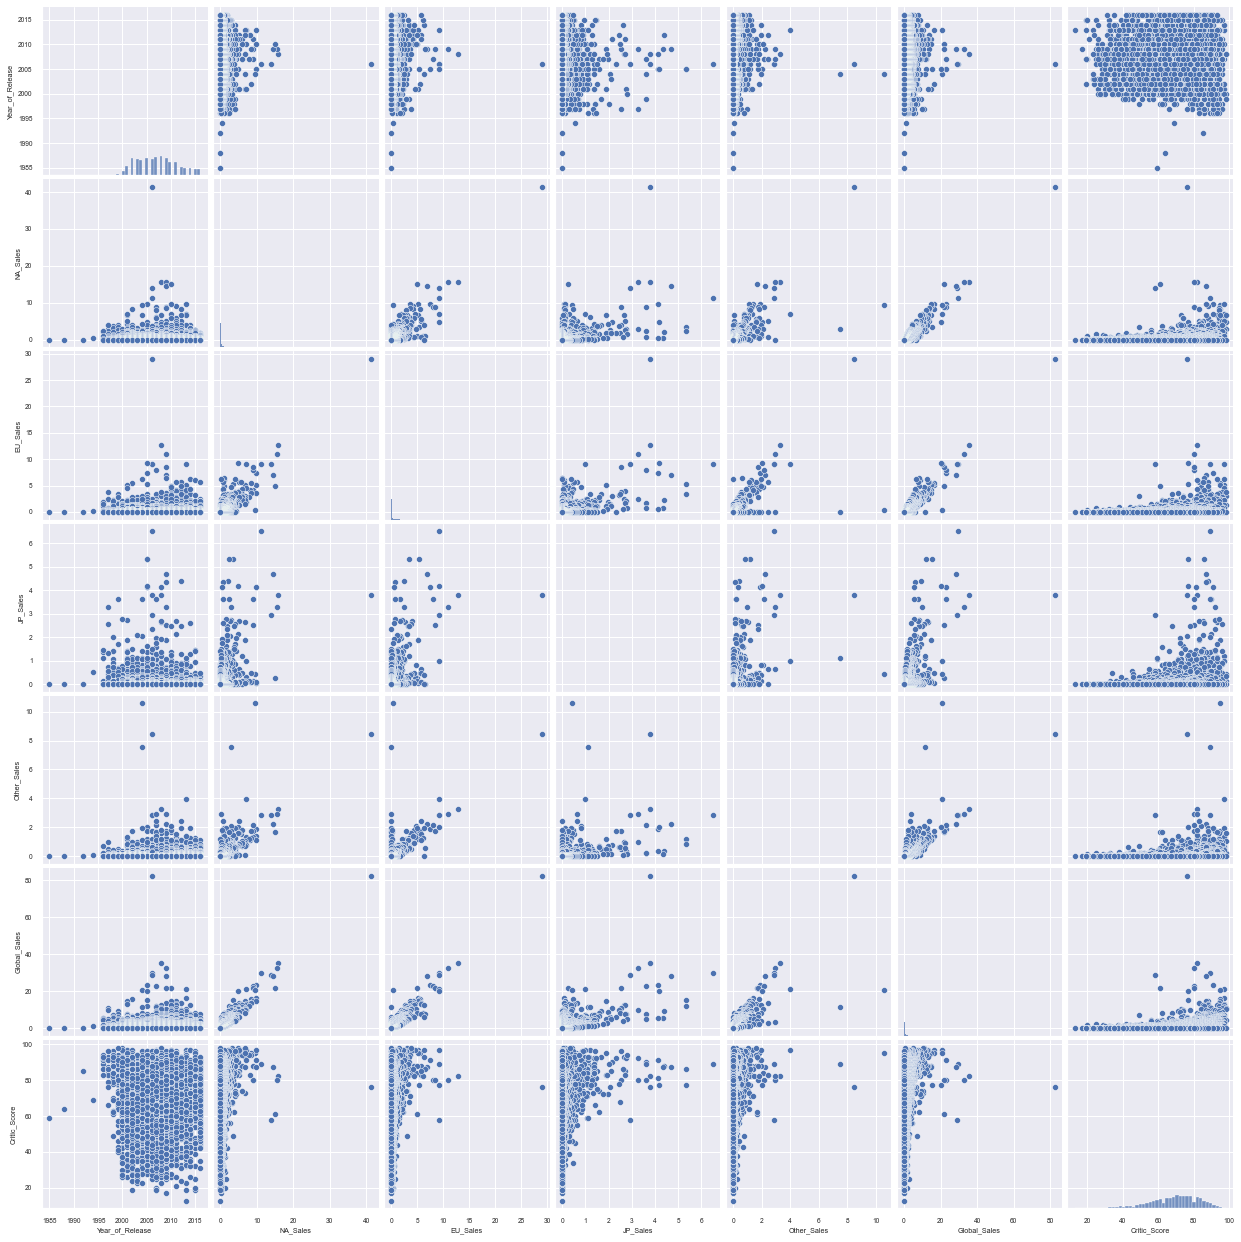

In [36]:
sns.pairplot(df_cleaned)

As you can see, outliers are see in most of the graphs. It would be interesting to look into those outliers. 


<AxesSubplot:xlabel='Platform', ylabel='count'>

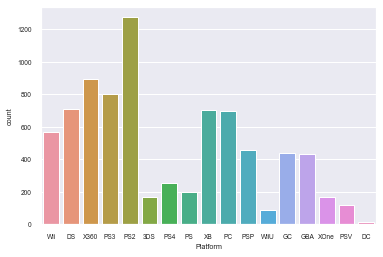

In [28]:

sns.set(font_scale=0.6)
sns.countplot(x=df_cleaned["Platform"])

<AxesSubplot:xlabel='Platform', ylabel='count'>

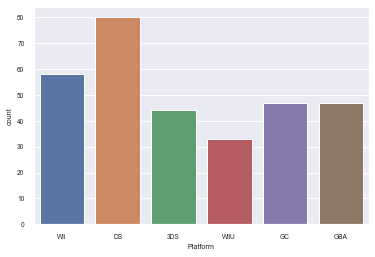

In [22]:
df2 = df_cleaned.copy()
df2 = df2[df2['Publisher'] == "Nintendo"]
df2
sns.countplot(x=df2["Platform"])


[Text(0.5, 1.0, 'Number of genres')]

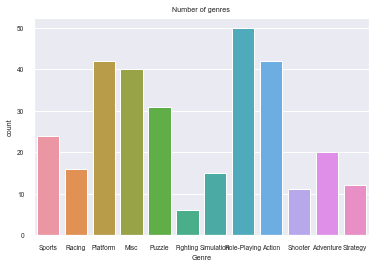

In [24]:
sns.countplot(x=df2["Genre"]).set(title="Number of genres")

## Method Chaining

In [47]:
df = (  
    pd.read_csv("../data/raw/Video_Games.csv")
    .drop(['User_Count','Critic_Count', 'Rating','User_Score'], axis=1)
    .dropna(axis=0)
    .loc[lambda x: x['Global_Sales'] >= 0]
    .loc[lambda x: x['NA_Sales'] >= 0]
    .loc[lambda x: x['JP_Sales'] >= 0]
    .loc[lambda x: x['EU_Sales'] >= 0]
    .loc[lambda x: x['Other_Sales'] >= 0]
    
)

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


In [49]:
def load_and_process(path):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(path)
        .loc[lambda x: x['Global_Sales'] >= 0]
        .loc[lambda x: x['NA_Sales'] >= 0]
        .loc[lambda x: x['JP_Sales'] >= 0]
        .loc[lambda x: x['EU_Sales'] >= 0]
        .loc[lambda x: x['Other_Sales'] >= 0]
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .drop(['User_Count','Critic_Count', 'Rating','User_Score'], axis=1)
          .dropna(axis=0)
      )

    # Make sure to return the latest dataframe

    return df2 

In [50]:
load_and_process("../data/raw/Video_Games.csv")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


In [23]:
import project_functions1

df = project_functions1.load_and_process("../data/raw/Video_Games.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


## Answering Questions

### Question 1: What game made the highest sale?

<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

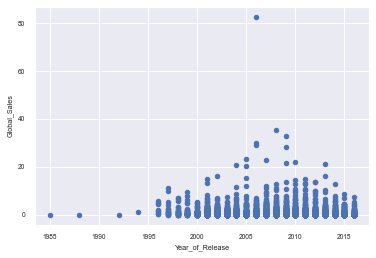

In [24]:
df.plot(kind='scatter', x='Year_of_Release', y='Global_Sales')

As I mentioned earlier, there is a game that made over 80 million. So let's look into it. 

The game that made the highest sale seems to be Wii Sports. 


### Question 2: What types of games were released the most for each platform?

Overall, action games and sports games were released the most for each platform. 

[Text(0.5, 1.0, 'Types of games that were produced for Wii')]

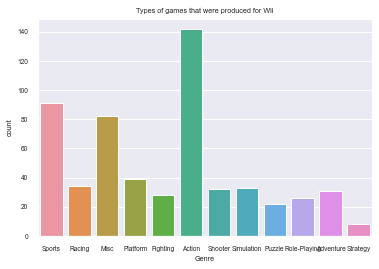

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
sns.set(font_scale=0.6)

df2 = df.copy()
df2 = df2[df2['Platform'] == "Wii"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were produced for Wii")


The graph shows that action games are popular in Wii. 

[Text(0.5, 1.0, 'Types of games that were produced for DS')]

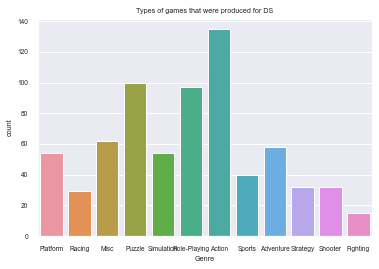

In [56]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "DS"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were produced for DS")

Similarly with Wii, action games are popular in DS.

[Text(0.5, 1.0, 'Types of games that were produced for PC')]

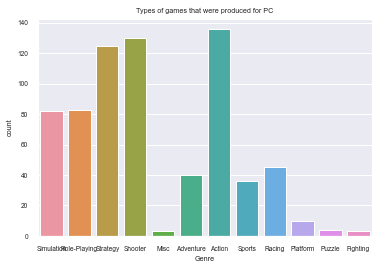

In [58]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "PC"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were produced for PC")

The graph shows that action games are most popular. But shooter and strategy games are also popular in PC.


[Text(0.5, 1.0, 'Types of games that were released for GC')]

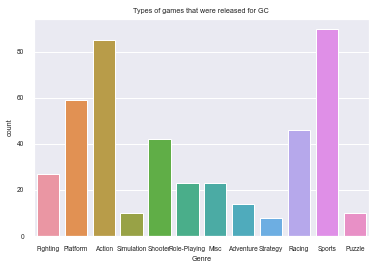

In [70]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "GC"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for GC")

This graph shows that sports games were released the most for GC. Additionally, it shows that action games were also released at high quantity. 


[Text(0.5, 1.0, 'Types of games that were released for X360')]

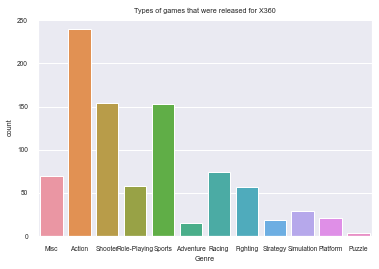

In [71]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "X360"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for X360")

This graph shows that action games released the most for X360.


[Text(0.5, 1.0, 'Types of games that were produced for PS3')]

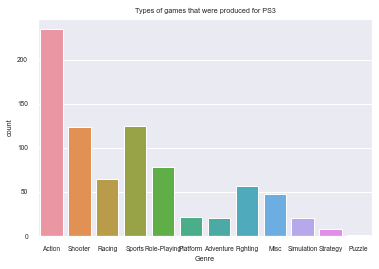

In [61]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "PS3"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for PS3")

The graph shows that action games were produced the most for PS3

[Text(0.5, 1.0, 'Types of games that were produced for PS2')]

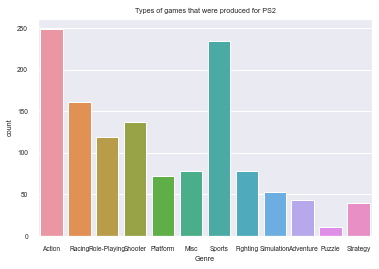

In [62]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "PS2"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for PS2")

The graph shows that action and sports games were released the most in PS2.

[Text(0.5, 1.0, 'Types of games that were released for 3DS')]

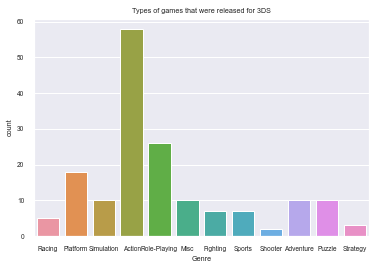

In [68]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "3DS"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for 3DS")

The graph shows that action games were released the most for 3DS.

[Text(0.5, 1.0, 'Types of games that were produced for PS4')]

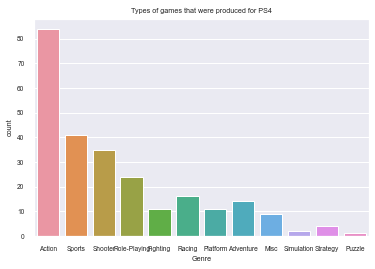

In [64]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "PS4"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were produced for PS4")

The graph shows that action games were released the most for PS4.

[Text(0.5, 1.0, 'Types of games that were produced for XB')]

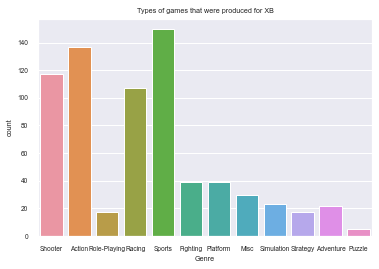

In [65]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "XB"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for XB")

The graph shows that sports games were released the most for XB.The second most released games were action games for XB.

[Text(0.5, 1.0, 'Types of games that were produced for PSP')]

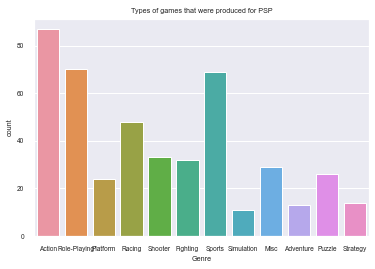

In [66]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "PSP"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for PSP")

The graph shows that action games were released the most for PSP. It also tells that role-playing and sports games were released at high quantity too. 

[Text(0.5, 1.0, 'Types of games that were produced for WiiU')]

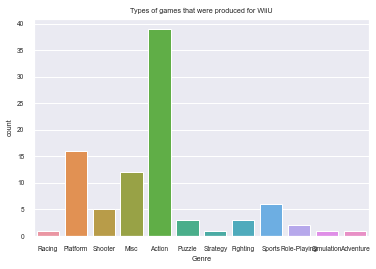

In [67]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "WiiU"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for WiiU")

[Text(0.5, 1.0, 'Types of games that were releasaed for GBA')]

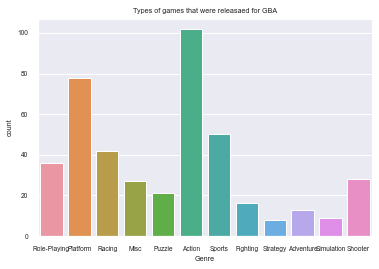

In [72]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "GBA"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were releasaed for GBA")

The graph shows that action games were released the most for GBA. It also shows that platform games were released at high quantity.

[Text(0.5, 1.0, 'Types of games that were released for PSV')]

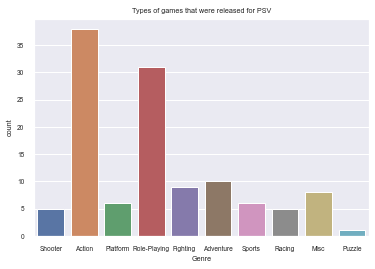

In [76]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "PSV"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were released for PSV")

The graph shows that action games were released the most for PSV. It also shows that the second most released games are role-playing games. 

[Text(0.5, 1.0, 'Types of games that were produced for XOne')]

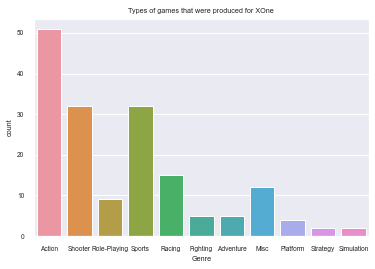

In [74]:
df2 = df.copy()
df2 = df2[df2['Platform'] == "XOne"]
sns.countplot(x=df2["Genre"]).set(title="Types of games that were produced for XOne")

The graph shows that action games were released the most for XOne. The second most released games are shooter and sports games. 

## Question 3: Which platform is famous?


To find an answer, we will plot a scatter diagram showing global sales of each platform.

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

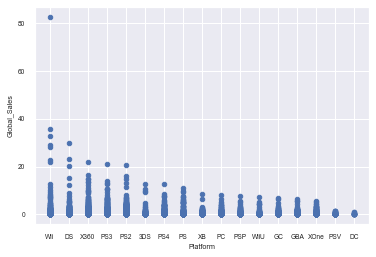

In [75]:
df.plot(kind='scatter', x='Platform', y='Global_Sales')

As you can see, Wii was the most famous platform. The second most famous is DS.

### Question 4: What year were the video games on a high note?


<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

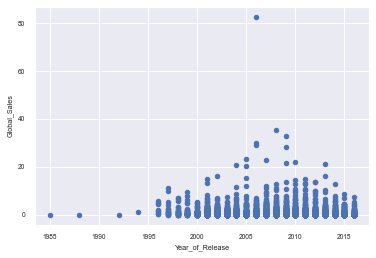

In [77]:
df.plot(kind='scatter', x='Year_of_Release', y='Global_Sales')

The graph shows that 2005~2010 was the period when video games started to gain its attention. 